In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def model(initial, t, parameters):
    omega1, omega2, theta1, theta2 = initial
    g, m1, m2, L1, L2 = parameters
    #f = [theta1', theta2', omega1', omega2']
    numerator1 = -g * (2*m1 + m2) * np.sin(theta1) - \
                m2 * g * np.sin(theta1 - 2*theta2) - \
                2*np.sin(theta1 - theta2) * m2 * \
                (omega2**2*L2 + omega1**2*L1*np.cos(theta1 - theta2))
    
    denominator1 = L1 * (2*m1 + m2 - m2*np.cos(2*theta1 - 2*theta2))
    
    numerator2 = 2*np.sin(theta1 - theta2)* \
                (omega1**2 * L1 * (m1 + m2) + \
                g*(m1 + m2)*np.cos(theta1) + \
                omega2**2*L2*m2*np.cos(theta1 - theta2))
    
    denominator2 = L2 * (2*m1 + m2 - m2*np.cos(2*theta1 - 2*theta2))
                
                
    f = [omega1,
         theta2,
         numerator1/denominator1,
         numerator2/denominator2
    ]
    return f
    

In [3]:
g = 10
m1 = 0.05
m2 = 0.05
L1 = 0.5
L2 = 0.3

In [4]:
initial = [1, 2, 0.5, 0.25]
parameters = [g, m1, m2, L1, L2]

In [5]:
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

In [6]:
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

In [7]:
sol = odeint(model, initial, t, args=(parameters,),
              atol=abserr, rtol=relerr)

In [8]:
with open('sol.txt', 'w') as f:
    for t1, w1 in zip(t, sol):
        f.write(str(t1) + ' ' + str(w1[0])+ ' ' +str(w1[1])+ ' ' +str(w1[2])+ ' ' +str(w1[3]) + '\n')

In [9]:
t, theta1, theta2, omega1, omega2 = np.loadtxt('sol.txt', unpack=True)

In [10]:
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2*np.sin(theta2)
y2 = y1 - L2*np.cos(theta2)

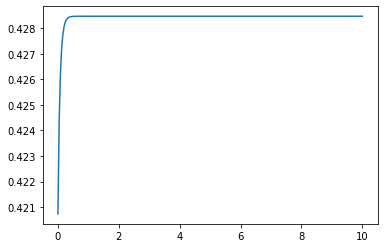

In [11]:
plt.plot(t, x1)

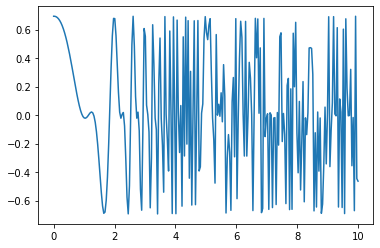

In [112]:
plt.plot(t, x2)

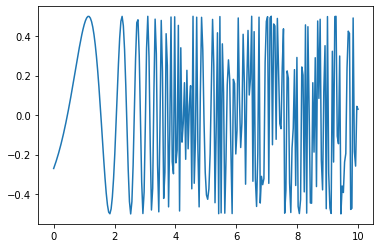

In [113]:
plt.plot(t, y1)

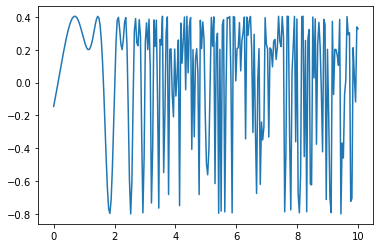

In [114]:
plt.plot(t, y2)